### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Общая информация по датафрейму

In [1]:
#импорт используемых бибилиотек
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#читаю датафрейм
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


•	Name — название игры (имеется два пропуска, так как это название, то можно смело удалять эти строки с пропусками)

•	Platform — платформа

•	Year_of_Release — год выпуска (сменить тип данных на дату)(думаю, пропуски тут случайные, поэтому не буду с ними ничего делать)

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100) (возможно не очень популярные игры или критики еще до них не дошли)

•	User_Score — оценка пользователей (максимум 10) (Не все пользователи любят ставить оценки, возмонжо это такой случай и пропуски стоит заменить нулями, также стоит проверить, возможно игры новые, и им еще не успели поставить оценки)(также стоит сменить тип данных на float)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.(заменю пропуски на NaN)

Все столбцы нужно привести к нижнему регистру.


## Подготовка данных


In [4]:
#приведу столбцы к нижнему регистру
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#замена типа данных в годе
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [6]:
#удаление пропусков в наименовании игры
df = df.dropna(subset = ['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


Пропуски в жанре тоже исчезли, видимо они шли в пару с наименованием.

In [7]:
#проверка датафрейма на дубликаты
df.duplicated().sum()

0

Отлично, дубликатов не имеем, теперь вопрос в остальных пропусках. Так как пропуски года составляют всего 1.6% то, полагаю, удаляя эти значения, мы не потеряем большое колиечство данных.

In [8]:
#удаление пропусков в годах
df = df.dropna(subset = ['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


Учитывая, что пропуски, скорее всего, являются не случайными, то смело можно из заменять, а не оставлять как есть. Так как столбец с рейтингом уже является объектом, то заменю пропуски на пустую строку, в столбце оценки пользователей и оценке критиков заменю на ноль, полагая что ноль это отстуствие рейтинга, а также проверю почему оценка пользователей имеет тип данных объекта а не числовой.

In [9]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
1         2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Аббревиатура 'tbd' это to be determined - пока не определён, что на мой взгляд равносильно 0 или NaN. Так что заменю все значения 'tbd' и пропуски на 0.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', 0)
df['user_score'].value_counts()

0      2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
1.5       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [11]:
df.fillna(
    value = 
        {
            'rating': " ",
            'critic_score': 0,
            'user_score': 0
        },
    inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null object
rating             16444 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


In [12]:
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


Теперь можно преступить к расчетам суммарных продаж во всех регионах.

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0.0,,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,,31.38


На данном этапе я устранила пропуски в столбцах, привела к нужным типам данных. Теперь данные готовы к дльнейшему анализу.

## Исследовательский анализ данных

### Гистограмма выпуска игр по годам.

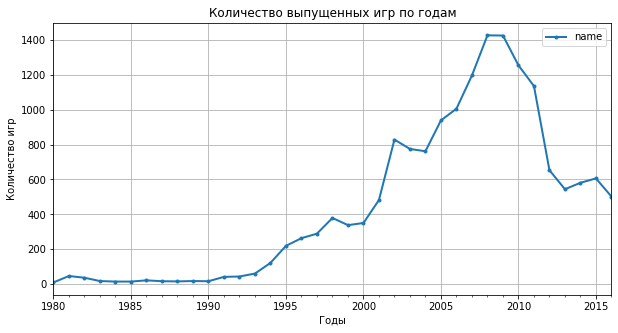

In [14]:
df.pivot_table(index='year_of_release', values='name', aggfunc = 'count').reset_index().plot(x='year_of_release', y='name', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Количество выпущенных игр по годам')
plt.ylabel("Количество игр")
plt.xlabel("Годы")
plt.show()

Думаю, данные в периоды до 1990 не важны и их можно спокойно исключать из выборки. Также наблюдаем что количество выпускаемых игр активно росло с 1990 по 2008 год, а с 2009 года начало падение числа выпускаемых игр. 

In [15]:
df = df.query('year_of_release >= 1990')

### Продажи игр по платформам

In [16]:
#отсортирую данные по платформам по их суммарным продажам
df.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').reset_index().sort_values(by = 'total_sales', ascending=False)


,platform,total_sales
15,PS2,1233.56
27,X360,961.24
16,PS3,931.34
25,Wii,891.18
3,DS,802.76
14,PS,727.58
17,PS4,314.14
5,GBA,312.88
18,PSP,289.53
1,3DS,257.81


Для распределения по годам, возьму из выборки платформы до PS, так как разница продаж уже PS и PS4 велика(почти в два раза).

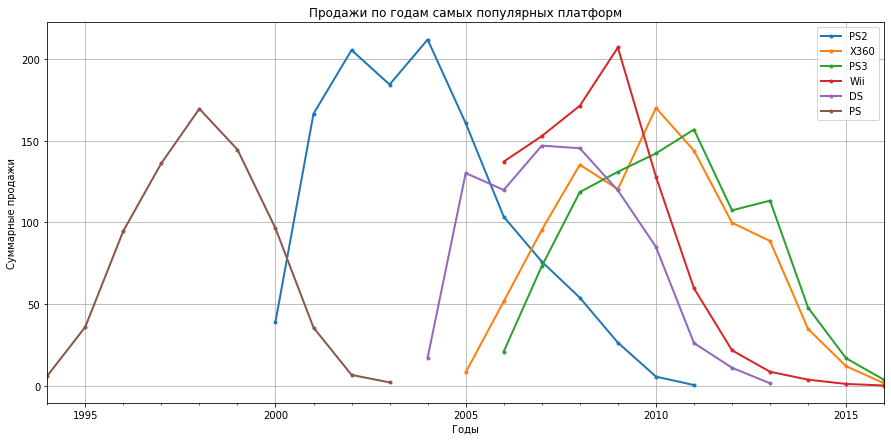

In [17]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for year in platforms:
    df.query('platform == @year').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(15,7), grid = True).set_title('Продажи по годам самых популярных платформ')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи")
    plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])
plt.show()
    

До 2010 года, новый платформы появлялись и исчезали старые примерно 10 лет(в среднем платформа живет 10 лет), в 2005 году (+- 2 года) появилось сразу несколько платформ. Самая старая платформа PS, самая молодая PS3. Общий спад по этим платформам происходит после 2015 года.

### Прогноз по данным на 2017 год

Для дальнейшего исследования выберу данные с 2005 года, так как на этот период выпадает сразу несколько платформ.

In [18]:
df = df.query('year_of_release >= 2008')
df.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').reset_index().sort_values(by = 'total_sales', ascending=False)


,platform,total_sales
5,PS3,837.19
11,X360,805.96
9,Wii,601.26
2,DS,388.60
6,PS4,314.14
0,3DS,257.81
13,XOne,159.32
3,PC,151.29
7,PSP,136.38
4,PS2,86.39


Возьму для дальнейшего анализа платформы до 3DS

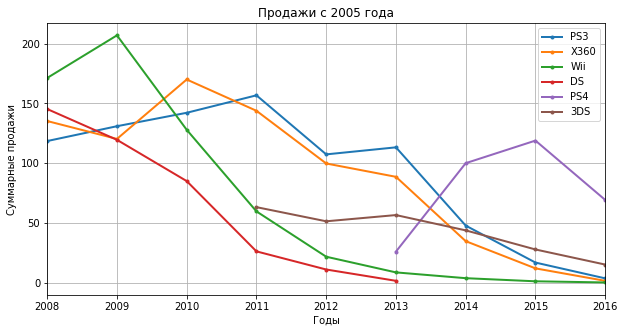

In [19]:
platforms = ['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS']
for year in platforms:
    df.query('platform == @year').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи с 2005 года')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи")
    plt.legend(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS'])

Рассмотрю и менее популярные платформы, чтобы посмотреть что происходит по ним к 2016 году

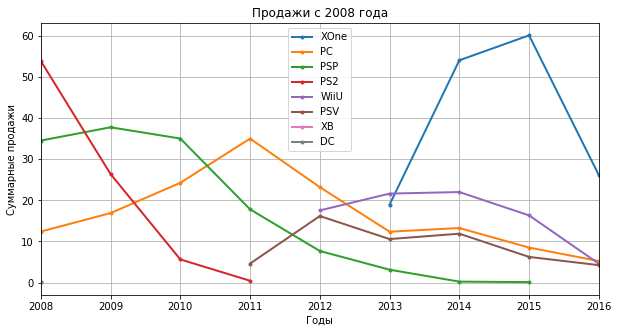

In [20]:
platforms = ['XOne', 'PC', 'PSP', 'PS2', 'WiiU', 'PSV', 'XB', 'DC']
for year in platforms:
    df.query('platform == @year').groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи с 2008 года')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи")
    plt.legend(['XOne', 'PC', 'PSP', 'PS2', 'WiiU', 'PSV', 'XB', 'DC'])

По менее популярным играм возможно будет дальнейший рост у платформ PC, XOne, WiiU, PSV. У остальных платформ к 2008 году закончилась жизнедеятельность. Для дальнейшего анализа как "наиболее перспективные" выделю PS4, 3DS, PC, XOne, WiiU, PSV. 

### график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


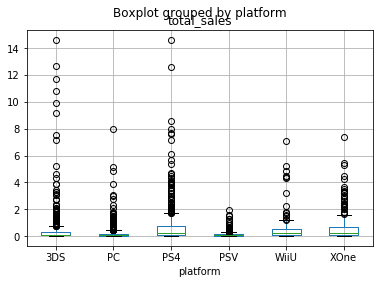

In [21]:
platforms = ['PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']
df.query('platform in @platforms').boxplot(by = 'platform', column = 'total_sales')
plt.show()


Наибольшие выбросы наблюдаются у платформ 3DS и PS4 возможно это связано с тем, что самые популярные игрв пишутся для этих платформ, самые меньшие продажи у PSV, скорее всего это связано с тем, что эта платформа только начинает набирать свои обороты.

### влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для этого этапа выберу платформу PS4, так как у неё выше средние продажи.

Text(0, 0.5, 'Суммарные продажи')

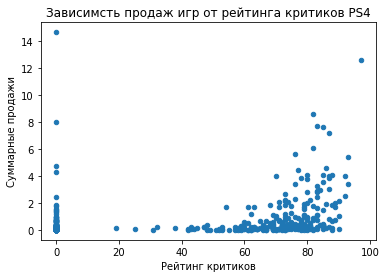

In [22]:
#диаграмма рассеяния платформы PS4
df.query('critic_score >= 0 & platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга критиков PS4')
plt.xlabel("Рейтинг критиков")
plt.ylabel("Суммарные продажи")

In [23]:
#корреляция 
df.query('critic_score >= 0 & platform == "PS4"').corr()


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.785362,0.472981,0.944259,0.217381,0.109930,0.928160
eu_sales,0.785362,1.000000,0.464563,0.944698,0.221950,0.111441,0.958157
jp_sales,0.472981,0.464563,1.000000,0.496467,0.011250,-0.027284,0.527129
other_sales,0.944259,0.944698,0.496467,1.000000,0.229948,0.115411,0.998051
critic_score,0.217381,0.221950,0.011250,0.229948,1.000000,0.900850,0.227550
user_score,0.109930,0.111441,-0.027284,0.115411,0.900850,1.000000,0.113116
total_sales,0.928160,0.958157,0.527129,0.998051,0.227550,0.113116,1.000000


Корреляция зависимости продаж от рейтинга критиков всего 0.227 

Корреляция зависимости продаж от рейтинга пользователей всего 0.113

Text(0, 0.5, 'Суммарные продажи')

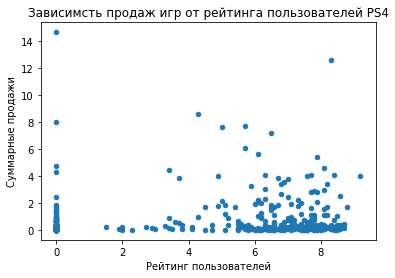

In [24]:
#диаграмма рассеяния в зависимости от рейтинга пользователей
df.query('user_score >= 0 & platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга пользователей PS4')
plt.xlabel("Рейтинг пользователей")
plt.ylabel("Суммарные продажи")

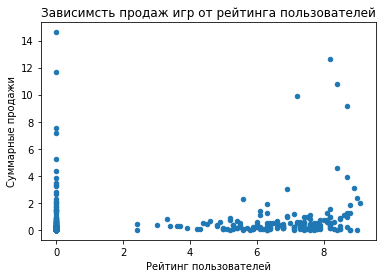

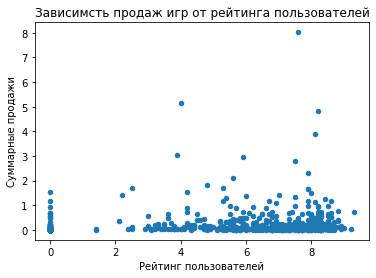

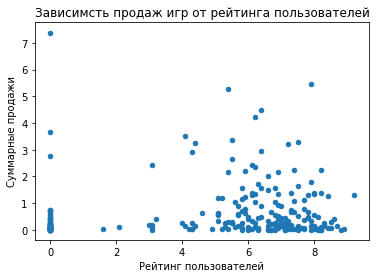

In [25]:
#Построю также диаграммы рассеяние зависимости от рейтинга пользователей
#для трёх менее популярных игр 3DS, PC и XOne
platforms = ['3DS', 'PC', 'XOne']
for score in platforms:
    df.query('platform == @score').plot(x='user_score', y='total_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга пользователей')
    plt.xlabel("Рейтинг пользователей")
    plt.ylabel("Суммарные продажи")

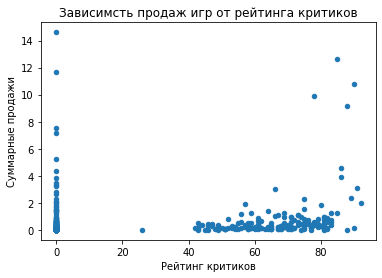

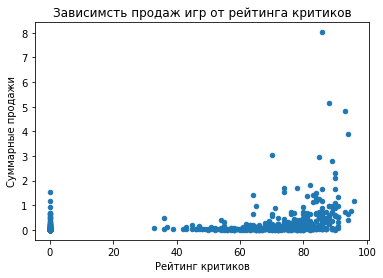

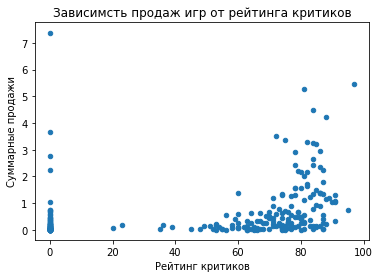

In [26]:
#Построю также диаграммы рассеяние зависимости от рейтинга критиков
#для трёх менее популярных игр 3DS, PC и XOne
platforms = ['3DS', 'PC', 'XOne']
for score in platforms:
    df.query('platform == @score').plot(x='critic_score', y='total_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга критиков')
    plt.xlabel("Рейтинг критиков")
    plt.ylabel("Суммарные продажи")

По графику зависимости можно сделать вывод, что когда у платформы оценки больше 80 от критиков и больше 6 от пользователей, то и суммарные продажи увеличиваются, это можно также подтвердить положительной корреляцией.

### Распределение игр по жанрам

In [27]:
#группировка игр по жанрам
pd.pivot_table(df, index='genre', values = 'name', aggfunc='count').reset_index()


,genre,name
0,Action,1988
1,Adventure,869
2,Fighting,308
3,Misc,994
4,Platform,244
5,Puzzle,257
6,Racing,403
7,Role-Playing,783
8,Shooter,583
9,Simulation,459


In [28]:
#группировка по самым продаваемым жанрам
pd.pivot_table(df, index='genre', values = 'total_sales', aggfunc='mean').reset_index().sort_values(by = 'total_sales', ascending=False)


,genre,total_sales
8,Shooter,1.043208
4,Platform,0.800738
10,Sports,0.584906
6,Racing,0.561811
7,Role-Playing,0.538404
2,Fighting,0.482175
0,Action,0.475724
3,Misc,0.398823
9,Simulation,0.328497
5,Puzzle,0.216420


Самые продаваемы жанры Shooter, Platform и Sports, самый непродаваемый жанр Adventure.  

Вывод по исследовательскому анализу данных.

В среднем срок жизни платформы 10 лет. С 1990 по 2010 год растет количество выпускаемых игр. Самые популярные и продаваемые выпускаемые игры находятся в жанрах Shooter, Platform и Sports. Для этого датасета "наиболее перспективные" платформы PS4, 3DS, PC, XOne, WiiU, PSV так как их рост еще не падает к 2016 году, и возможно пик роста произойдет дальше.

По рейтингу если игры на платформе имееют оценку критиков выше 80 и оценку пользователей больше 6, то их продажи будут увеличиваться.

## Портрет пользователя каждого региона

In [29]:
#функция для построения дальнейших диаграмм
def regions_plot(groupby, region_sales):
    pivot = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'продажи в Северной Америке', 'eu_sales': 'продажи в Европе', 'jp_sales': 'продажи в Японии'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], 
                   fontsize=18, rot=45)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

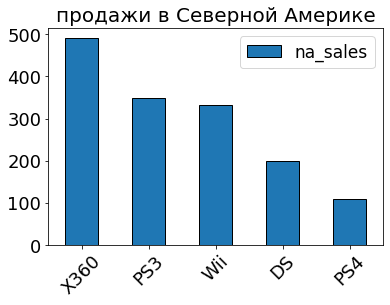

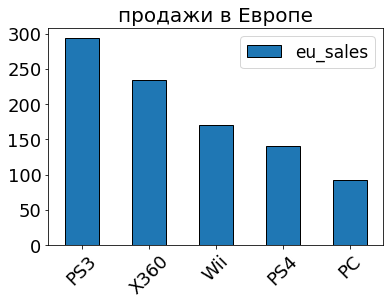

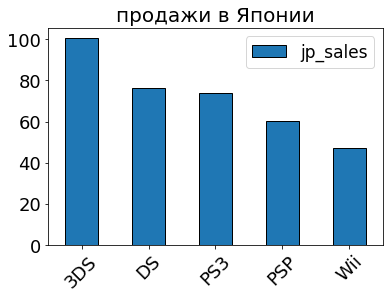

In [30]:
#самые популярные платформы
regions_plot('platform', 'na_sales')
regions_plot('platform', 'eu_sales')
regions_plot('platform', 'jp_sales')

В Америке самой популярной платформой является  X360, в Европе PS3, в Японии 3DS

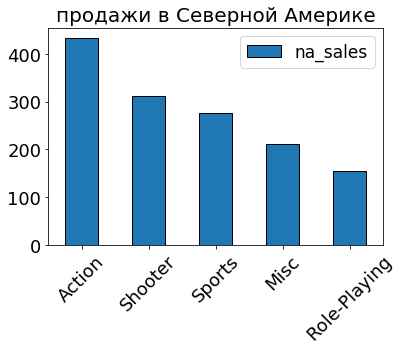

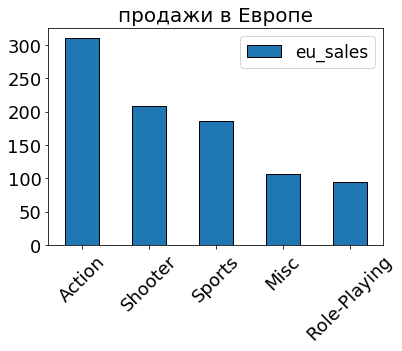

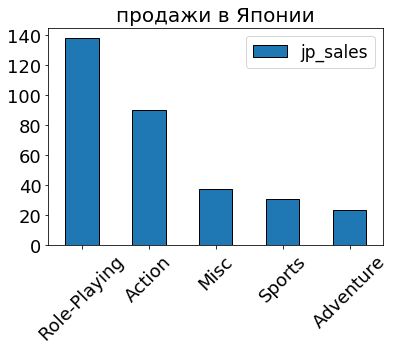

In [31]:
#самые популярные жанры
regions_plot('genre', 'na_sales')
regions_plot('genre', 'eu_sales')
regions_plot('genre', 'jp_sales')

Самый популярный жанр игр в Америке и Европе  Action, а в Японии Role-Plaing

In [32]:
#Группировка рейтинга
df['rating'].value_counts()

        3025
E       1823
T       1362
E10+     980
M        933
EC         6
RP         1
Name: rating, dtype: int64

In [33]:
#Переведу на более понятный язык
def esrb(row):
    if row['rating'] == 'E':
        return 'Для всех'
    if row['rating'] == 'T':
        return '13-19 лет'
    if row['rating'] == 'E10+':
        return '> 10 лет'
    if row['rating'] == 'M':
        return '> 17 лет'
    return 'Неопределенный рейтинг'

In [34]:
df['esrb'] = df.apply(esrb, axis=1)


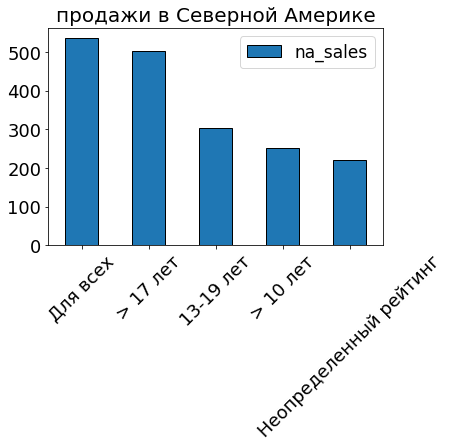

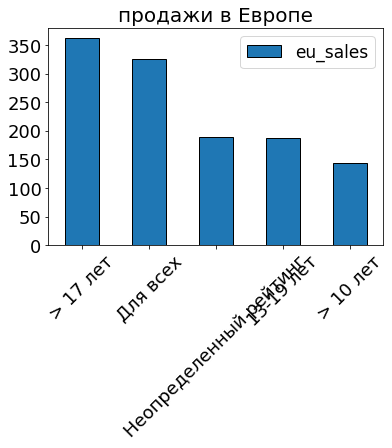

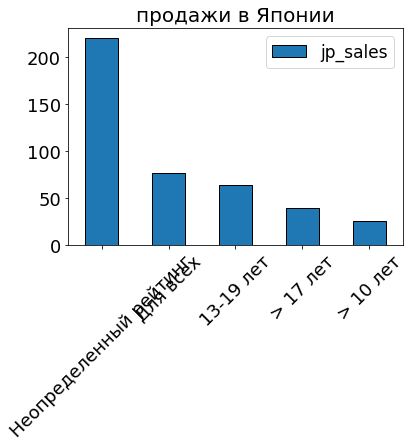

In [35]:
#Продажи игр по рейтингу
regions_plot('esrb', 'na_sales')
regions_plot('esrb', 'eu_sales')
regions_plot('esrb', 'jp_sales')

 По возрастному рейтингу в Америке и Европе популярны игры "Для всех" и для людей старше 17 лет. В Японии же самые популярные игры с неопределенным рейтингом, что по сети тоже является "Для всех", а следубщие по популярности игры с для всех и с 13-19 лет. По этому рейтингу можно судить что чаще всего покупают игры для всех возрастов.
 
Из чего можно сделать общий вывод что по рейтингу возраста самые популярные игры это для всех возрастов и старше 17 лет, для Америки и Европы. Также самые популярные жанры это Action, но в Японии больше любят ролевые игры. Самые популярные плтформы по рейтингу трех стран это X360 для Америки, в Европе PS3, в Японии DS.

## Проверка Гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [36]:
#выборка по платформам
df_xone = df.query('platform == "XOne" & user_score > 0')
df_pc = df.query('platform == "PC" & user_score > 0')

In [37]:
#проверка гипотезы
alpha = 0.05 
results = st.ttest_ind(
    df_xone['user_score'], 
    df_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1295458611061516
Не получилось отвергнуть нулевую гипотезу


По нулевой гипотезе получаем, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports не различаются.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [38]:
#выборка по жанрам
df_sport = df.query('genre == "Sports" & user_score > 0')
df_action = df.query('genre == "Action" & user_score > 0')

In [39]:
#проверка гипотезы
alpha = 0.05 
results = st.ttest_ind(
    df_sport['user_score'], 
    df_action['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9150743334562065e-15
Отвергаем нулевую гипотезу


Отвергая нулевую гипотезу, предполагаем, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

В данном датафрейме данные пришли в нелучшем виде. В данных нужно было исправлять тип, а также разбираться с пропусками в столбцах.

Платформв живут примерно 10 лет. В 2005 году (+- 2 года) появилось сразу несколько платформ. Самая старая платформа PS, самая молодая PS3. Общий спад по этим платформам происходит после 2015 года.

С 1990 по 2010 год растет количество выпускаемых игр. Самые популярные продаваемые игры находятся в жанрах Shooter, Platform и Sports. Для этого датасета "наиболее перспективные" платформы PS4, 3DS, PC, XOne, WiiU, PSV так как их рост еще не падает к 2016 году, и возможно пик роста произойдет дальше.

По рейтингу игры на платформе, если имеют оценку критиков выше 80 и оценку пользователей больше 6, то их продажи будут увеличиваться.

 
По возрастному рейтингу можно сделать вывод что самые популярные игры это для всех возрастов и старше 17 лет, для Америки и Европы, для Японии с 13 лет и для всех возрастов. Также самые популярные жанры это Action, но в Японии больше любят ролевые игры. Самые популярные плтформы по рейтингу трех стран это X360 для Америки, в Европе PS3, в Японии DS.

Получив данные проверки гипотез, предположила, что что средние пользовательские рейтинги платформ Xbox One и PC не отличаются, а также, что средние пользовательские рейтинги жанров Action и Sports различаются.